**Importing necessary libraries for data visualization and manipulation**

In [ ]:
# Used for creating static, interactive, and animated visualizations in Python
import matplotlib.pyplot as plt
# Used for creating line markers within plots
from matplotlib.lines import Line2D
# Provides a way of using operating system dependent functionality like reading or writing to a file system
import os
# Implements binary protocols for serializing and de-serializing a Python object structure.
import pickle
# Data manipulation and analysis library
import pandas as pd
# Fundamental package for scientific computing with Python
import numpy as np
# Represents a duration, the difference between two dates or times.
from datetime import timedelta
from scipy import interpolate  # Subpackage for interpolation which provides functions to deal with interpolation algorithms.
# Functions for performing B-spline representation and evaluation
from scipy.interpolate import splrep, splev, CubicSpline
from sklearn.model_selection import train_test_split
from scipy import signal
from scipy.stats import pearsonr

**TRAIN DATA**

**import BP & PPG train data**

In [ ]:
extracted_folder = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/Train Files'

# Initializes an empty list named BP_dataframes that will later store the .pkl data as pandas DataFrames
BP__train_dataframes = []

#Initializes an empty dictionary that will be used to map patient IDs to their respective index in the BP_dataframes
ID2Index = {}

# Function extracts patient_id from a file_name
def extract_patient_id(file_name):
    return file_name.split('_')[-1].split('.')[0]

# List all .pkl files in the directory
pkl_files = [f for f in os.listdir(extracted_folder) if f.endswith('.pkl')]

# Loop through the files and load each as a DataFrame, storing them with the patient ID as a column
# Thus, every patient has a dataframe
# 'enumerate()' is used here to get both the index (i) and the filename (file_name) in each iteration
for i, file_name in enumerate(pkl_files):
    # Process only PPG files
    if "BP" in file_name:
        # Calls the previously defined extract_patient_id function to get the patient_id from the filename
        patient_id = extract_patient_id(file_name)
        file_path = os.path.join(extracted_folder, file_name)
        with open(file_path, 'rb') as file:
            # Load Data by using pickle.load
            data = pickle.load(file)
            # Inserts new column at the first index of DataFrame with a label "ID" filled with the patient_id
            data.insert(0,"ID",patient_id)
            BP__train_dataframes.append(data)
            # Map Patient_id to Index by updating the ID2Index dict, setting the current patient_id as a key whose value
            #  is the current index of the DataFrame in ppg_dataframes.
            ID2Index[patient_id] = len(BP_train_dataframes) - 1

In [ ]:
extracted_folder = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/Train Files'

# Initializes an empty list named ppg_dataframes that will later store the .pkl data as pandas DataFrames
ppg__train_dataframes = []

#Initializes an empty dictionary that will be used to map patient IDs to their respective index in the ppg_dataframes
ID2Index = {}

# Function extracts patient_id from a file_name
def extract_patient_id(file_name):
    return file_name.split('_')[-1].split('.')[0]

# List all .pkl files in the directory
pkl_files = [f for f in os.listdir(extracted_folder) if f.endswith('.pkl')]

# Loop through the files and load each as a DataFrame, storing them with the patient ID as a column
# Thus, every patient has a dataframe
# 'enumerate()' is used here to get both the index (i) and the filename (file_name) in each iteration
for i, file_name in enumerate(pkl_files):
    # Process only PPG files
    if "PPG" in file_name:
        # Calls the previously defined extract_patient_id function to get the patient_id from the filename
        patient_id = extract_patient_id(file_name)
        file_path = os.path.join(extracted_folder, file_name)
        with open(file_path, 'rb') as file:
            # Load Data by using pickle.load
            data = pickle.load(file)
            # Inserts new column at the first index of DataFrame with a label "ID" filled with the patient_id
            data.insert(0,"ID",patient_id)
            ppg__train_dataframes.append(data)
            # Map Patient_id to Index by updating the ID2Index dict, setting the current patient_id as a key whose value
            #  is the current index of the DataFrame in ppg_dataframes.
            ID2Index[patient_id] = len(ppg_train_dataframes) - 1

**TEST DATA**

**Import BP & PPG test data**

In [ ]:
extracted_folder = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/Test Files'

# Initializes an empty list named BP_dataframes that will later store the .pkl data as pandas DataFrames
BP__test_dataframes = []

#Initializes an empty dictionary that will be used to map patient IDs to their respective index in the BP_dataframes
ID2Index = {}

# Function extracts patient_id from a file_name
def extract_patient_id(file_name):
    return file_name.split('_')[-1].split('.')[0]

# List all .pkl files in the directory
pkl_files = [f for f in os.listdir(extracted_folder) if f.endswith('.pkl')]

# Loop through the files and load each as a DataFrame, storing them with the patient ID as a column
# Thus, every patient has a dataframe
# 'enumerate()' is used here to get both the index (i) and the filename (file_name) in each iteration
for i, file_name in enumerate(pkl_files):
    # Process only PPG files
    if "BP" in file_name:
        # Calls the previously defined extract_patient_id function to get the patient_id from the filename
        patient_id = extract_patient_id(file_name)
        file_path = os.path.join(extracted_folder, file_name)
        with open(file_path, 'rb') as file:
            # Load Data by using pickle.load
            data = pickle.load(file)
            # Inserts new column at the first index of DataFrame with a label "ID" filled with the patient_id
            data.insert(0,"ID",patient_id)
            BP__test_dataframes.append(data)
            # Map Patient_id to Index by updating the ID2Index dict, setting the current patient_id as a key whose value
            #  is the current index of the DataFrame in ppg_dataframes.
            ID2Index[patient_id] = len(BP_test_dataframes) - 1

In [ ]:
extracted_folder = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/Test Files'

# Initializes an empty list named ppg_dataframes that will later store the .pkl data as pandas DataFrames
ppg__test_dataframes = []

#Initializes an empty dictionary that will be used to map patient IDs to their respective index in the ppg_dataframes
ID2Index = {}

# Function extracts patient_id from a file_name
def extract_patient_id(file_name):
    return file_name.split('_')[-1].split('.')[0]

# List all .pkl files in the directory
pkl_files = [f for f in os.listdir(extracted_folder) if f.endswith('.pkl')]

# Loop through the files and load each as a DataFrame, storing them with the patient ID as a column
# Thus, every patient has a dataframe
# 'enumerate()' is used here to get both the index (i) and the filename (file_name) in each iteration
for i, file_name in enumerate(pkl_files):
    # Process only PPG files
    if "PPG" in file_name:
        # Calls the previously defined extract_patient_id function to get the patient_id from the filename
        patient_id = extract_patient_id(file_name)
        file_path = os.path.join(extracted_folder, file_name)
        with open(file_path, 'rb') as file:
            # Load Data by using pickle.load
            data = pickle.load(file)
            # Inserts new column at the first index of DataFrame with a label "ID" filled with the patient_id
            data.insert(0,"ID",patient_id)
            ppg__test_dataframes.append(data)
            # Map Patient_id to Index by updating the ID2Index dict, setting the current patient_id as a key whose value
            #  is the current index of the DataFrame in ppg_dataframes.
            ID2Index[patient_id] = len(ppg_test_dataframes) - 1

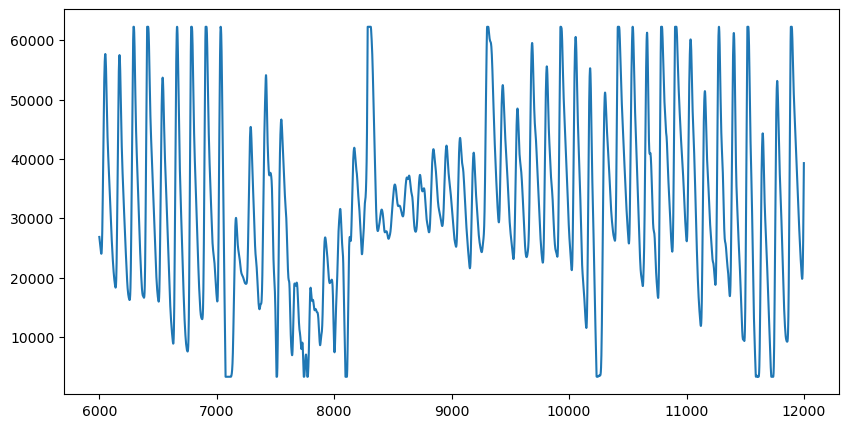

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ppg_dataframes[0]['PLETH'][6000:12000])

**Combine PPG and BP data based on 1 minute segments with BP measurment**

In [ ]:
def get_combined_segments(bp_dataframes, ppg_dataframes):
    """
    This function combines blood pressure (BP) data with photoplethysmogram (PPG) data for corresponding patients
    within a specified time window. For each BP measurement, it extracts the corresponding PPG data with an additional
    2.5 seconds padding before and after the one-minute window.

    Parameters:
    bp_dataframes (list of pd.DataFrame): A list of pandas DataFrames, each containing BP data for a patient.
    ppg_dataframes (list of pd.DataFrame): A list of pandas DataFrames, each containing PPG data for a patient.

    Returns:
    combined_segments_list (list of pd.DataFrame): A list of pandas DataFrames, each containing the combined PPG data
    with the corresponding BP measurements for a patient.
    """
    combined_segments_list = []
    global_window_idx = 0  # Initialize a global counter for unique window_idx

    for i, bp_df in enumerate(bp_dataframes):
        # Retrieve the corresponding PPG DataFrame
        ppg_df = ppg_dataframes[i]

        # Convert 'DataTime' columns to datetime for both BP and PPG DataFrames
        bp_df['DataTime'] = pd.to_datetime(bp_df['DataTime'])
        ppg_df['DataTime'] = pd.to_datetime(ppg_df['DataTime'])

        # Iterate through each row in the BP DataFrame
        for idx, row in bp_df.iterrows():
            patient_id = row['ID']
            bp_time = row['DataTime']

            # Define the time window for PPG data with additional 2.5 seconds padding on both sides
            start_time = bp_time - pd.Timedelta(seconds=62.5)
            end_time = bp_time + pd.Timedelta(seconds=2.5)

            # Filter the PPG DataFrame for the given time window and patient ID
            ppg_segment = ppg_df[
                (ppg_df['ID'] == patient_id) &
                (ppg_df['DataTime'] >= start_time) &
                (ppg_df['DataTime'] <= end_time)
            ].copy()

            # Add BP data columns to the PPG segment
            ppg_segment['SBP'] = row['SBP']
            ppg_segment['DBP'] = row['DBP']
            ppg_segment['MAP'] = row['MAP']
            ppg_segment['window_idx'] = global_window_idx  # Assign a unique window_idx

            # Append the segment to the list
            combined_segments_list.append(ppg_segment)

            # Increment the global window_idx counter
            global_window_idx += 1

    return combined_segments_list

# Assuming BP_dataframes and ppg_dataframes are already loaded
combined_train_segments_list = get_combined_segments(BP_train_dataframes, ppg_train_dataframes)
combined_test_segments_list = get_combined_segments(BP_test_dataframes, ppg_test_dataframes)

In [ ]:
#number of total segments found:
len(combined_segments_list)

2678

Filtering segments and get only the segments that have 6500 lines ( 65 sec * 100 ms)

In [ ]:
def filter_segments_by_row_count_and_perfusion_index(segments, row_count=6500):
    """
    Filters a list of DataFrames to only include those with a specific number of rows and a PERFUSION_INDEX greater than or equal to 1.

    Parameters:
    segments (list of pd.DataFrame): A list of pandas DataFrames, each representing a segment of combined PPG and BP data.
    row_count (int): The required number of rows for each segment to be included in the filtered list (default is 6500).

    Returns:
    filtered_segments_list (list of pd.DataFrame): A list of pandas DataFrames that meet the criteria of having exactly
    row_count rows and a PERFUSION_INDEX greater than or equal to 1.
    """
    filtered_segments_list = []

    for segment in segments:
        if len(segment) == row_count and (segment['PERFUSION_INDEX'] >= 1).all():
            filtered_segments_list.append(segment)

    return filtered_segments_list

# Filter combined_segments to only include DataFrames with exactly 6500 rows and PERFUSION_INDEX >= 1
filtered_train_segments = filter_segments_by_row_count_and_perfusion_index(combined_train_segments_list, 6500)
filtered_test_segments = filter_segments_by_row_count_and_perfusion_index(combined_test_segments_list, 6500)
# Display the number of filtered segments
print(f"Number of segments with exactly 6500 rows and PERFUSION_INDEX >= 1: {len(filtered_segments)}")


Number of segments with exactly 6500 rows and PERFUSION_INDEX >= 1: 929


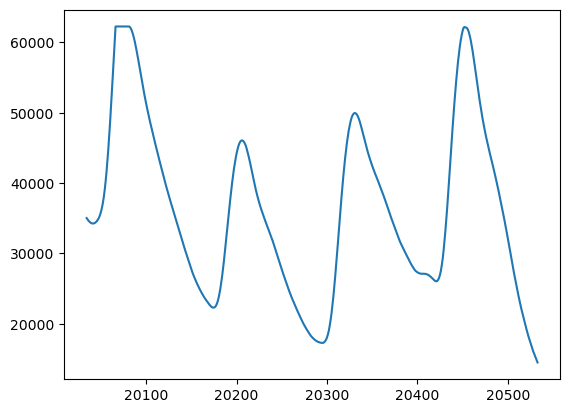

In [ ]:
#example:
plt.plot(filtered_segments[0]['PLETH'][4000:4500])

In [ ]:
def replace_values_with_nan(segments, saturation_values):
    """
    Replaces specified values in the 'PLETH' column of each DataFrame with NaN.

    Parameters:
        dataframes (dict): A dictionary of pandas DataFrame objects, each containing PPG data.
        saturation_values (list): Numeric values to be replaced with NaN in the 'PLETH' column.

    Returns:
        dict: The updated dictionary of DataFrames with specified values replaced by NaN in the 'PLETH' column.
    """
    nan_segments = []
    for segment in segments:
        nan_segment = segment.copy()
        nan_segment.loc[:, 'PLETH'] = nan_segment['PLETH'].replace(saturation_values, np.nan)
        nan_segments.append(nan_segment)

    return nan_segments

saturation_values = [1.0, 3276.0, 62258.0, 65535.0]
nan_train_segments = replace_values_with_nan(filtered_train_segments, saturation_values)
nan_test_segments = replace_values_with_nan(filtered_test_segments, saturation_values)

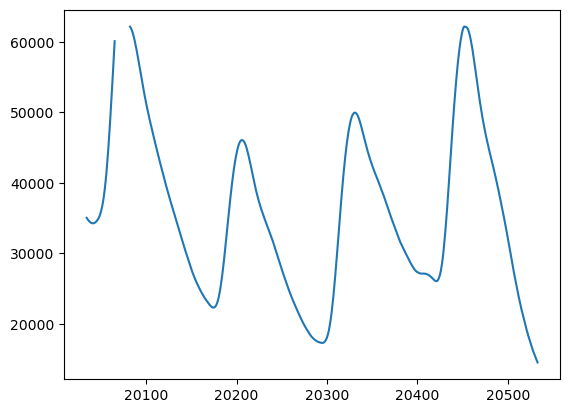

In [ ]:
plt.plot(nan_segments[0]['PLETH'][4000:4500])

**Imputation - BSpline / Cubic by hole size:**

In [ ]:
def interpolate_nans(segment_with_nan):
    """
    Interpolates NaN values in a window using cubic spline interpolation based on valid points.

    Parameters:
    segment_with_nan (np.array): Array containing NaN values to be interpolated.

    Returns:
    np.array: Array with NaN values interpolated.
    """
    valid_indices = np.where(~np.isnan(segment_with_nan))[0]
    nan_indices = np.where(np.isnan(segment_with_nan))[0]
    valid_values = segment_with_nan[valid_indices]  # Extract the non-NaN values

    if len(nan_indices) == 0:
        # If there are no NaNs, just append the original segment
        return segment_with_nan
    else:
        # Split the nan_indices array into contiguous segments
        nan_segments_list = np.split(nan_indices, np.where(np.diff(nan_indices) != 1)[0] + 1)

        for nan_segment in nan_segments_list:
            hole_size = len(nan_segment)

            if 2 <= hole_size <= 66: # Apply B-spline interpolation
                # Fit the B-spline model to the valid point
                tck = splrep(valid_indices, valid_values, k=2)
                # Interpolate the NaN points
                imputed_values = splev(nan_indices, tck)  # Use the B-spline to evaluate the NaN points

            else: # Apply cubic spline interpolation
                # Fit the cubic spline model to the valid points
                cs = CubicSpline(valid_indices, valid_values)
                # Interpolate the NaN points
                imputed_values = cs(nan_indices)

            # Create the complete window by filling in the interpolated values
            complete_segment_with_interpolation = segment_with_nan.copy()
            complete_segment_with_interpolation[nan_indices] = imputed_values

        return complete_segment_with_interpolation

In [ ]:
def impute_nans_with_spline(nan_segments):
    """
    Imputes NaN values in a list of DataFrames using cubic spline interpolation.

    Parameters:
    nan_segments (list of pd.DataFrame): List of DataFrames containing NaN values to be imputed.

    Returns:
    list of pd.DataFrame: List of DataFrames with NaN values imputed.
    """
    imputed_segments_list = []

    for i, segment_df in enumerate(nan_segments):
        segment_with_nan = segment_df['PLETH'].values
        imputed_segment = interpolate_nans(segment_with_nan)
        imputed_df = segment_df.copy()
        imputed_df['PLETH'] = imputed_segment
        imputed_segments_list.append(imputed_df)

    return imputed_segments_list

In [ ]:
imputed_train_segments = impute_nans_with_spline(nan_train_segments)
imputed_test_segments = impute_nans_with_spline(nan_test_segments)

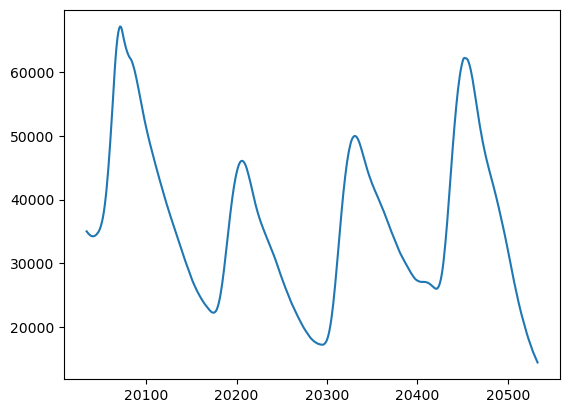

In [ ]:
#example of the imputed segment:
plt.plot(imputed_segments[0]['PLETH'][4000:4500])

**Filtering Proper windows:**

In [ ]:
def FindProperWindows(PPG, Windows_Table, window_id, proper_windows):
    """
    Identifies and processes proper windows from the PPG data.

    Parameters:
    - PPG (DataFrame): The PPG signal data.
    - Windows_Table (DataFrame): The table to store window information and results.
    - start_window_id (int): The starting window_id for this segment.
    - proper_windows (dict): Dictionary to store the proper windows identified.

    Returns:
    - DataFrame: The updated Windows_Table with proper window information.
    - int: The updated window_id to continue from for the next segment.
    """
    window_size = 12 * 100  # 12 seconds window with fs=100
    start_idx = 0
    window_id = window_id
    windows_list = []

    wind = WindowFullProcess(PPG, by_value=True)

    # Append information to list
    window_info = {
        'window_id': window_id,
        'start_index': start_idx,
        'end_index': start_idx + window_size,
        'ProperWindow': False  # Default value, will be updated later
    }
    windows_list.append(window_info)

    Rejecting_Window(wind, windows_list[-1], window_id)

    if windows_list[-1]['ProperWindow']:
        wind['window_index'] = window_id
        proper_windows[window_id] = wind  # Store the proper window directly in the dictionary
        print(window_id)

    new_windows = pd.DataFrame(windows_list)
    Windows_Table = pd.concat([Windows_Table, new_windows], ignore_index=True)

    Windows_Table['ProperWindow'] = Windows_Table['ProperWindow'].astype(bool)
    return Windows_Table, window_id


In [ ]:
def Reset_Column(Table, col_name, col_ind, default):
    """
    Resets a column in the DataFrame to a specified default value.

    Parameters:
    - Table (DataFrame): The DataFrame to update.
    - col_name (str): The name of the column to reset.
    - col_ind (int): The index position to insert the column if it does not exist.
    - default: The default value to set for the column.

    """
    if col_name not in Table.columns:
        Table.insert(col_ind, col_name, default)
    else:
        Table[col_name] = default

In [ ]:
def WindowFullProcess(wind, by_value=False, wind_id=None, fs=100, padding=250):
    """
    Processes a window of PPG data by applying various filters and transformations.

    Parameters:
    - wind (DataFrame): The window of PPG data to process.
    - by_value (bool): If True, processes a copy of the input data (default is False).
    - wind_id (optional): Identifier for the window.
    - fs (int): Sampling frequency (default is 100).
    - padding (int): Padding value for auto-correlation (default is 250).

    Returns:
    - DataFrame: The processed window of PPG data.
    """
    if by_value:
        wind = wind.copy()

    PLETH = wind['PLETH']

    # Initialize DataTime if not present
    if 'DataTime' not in wind.columns:
        wind['DataTime'] = np.arange(len(wind)) / fs

    # Apply butter - lowpass filter:
    filtered = Segment_Filter(PLETH, ftype='low', fs=fs)
    wind['F_PLETH'] = filtered

    # Removes the trend (Highpass filter) from the PPG signal:
    high_detrended = Segment_Trend_Removel(filtered, ftype='high', fs=fs)
    wind['HiDeTr_PLETH'] = high_detrended

    # Computes the auto-correlation of the PPG signal with normalization:
    auto_correlation = Segment_AutoCorrelation(high_detrended, normalized=True, padding=int(1*fs)) # 1*fs=1[sec]
    wind['NoAuCo_PLETH'] = auto_correlation

    # Detects min and max peaks in the PPG signal.
    get_peaks(wind, y_name='HiDeTr_PLETH', is_window=True, method='SDET', padding=int(0.5*fs)) # 0.5*fs=2[sec]

    # Tests if the window contains consistent extremum points (maxima and minima).
    max_min_test(wind, to_raise=True)

    if by_value:
        return wind

In [ ]:
def Segment_Filter(y, ftype='low', fs=100):
    """
    Applies a filter to the PPG signal.

    Parameters:
    - y (Series): The PPG signal to filter.
    - ftype (str): The type of filter to apply ('low' for lowpass, 'SG' for Savitzky-Golay).
    - fs (int): Sampling frequency (default is 100).

    Returns:
    - ndarray: The filtered PPG signal.
    """
    if ftype == 'SG':
        filtered = signal.savgol_filter(y, window_length=19, polyorder=4)
    elif ftype == 'low':
        b, a = signal.butter(5, 10, 'lowpass', fs=fs)
        filtered = signal.filtfilt(b, a, y)
    return filtered

In [ ]:
def Segment_Trend_Removel(y, ftype='linar', fs=100):
    """
    Removes the trend from the PPG signal.

    Parameters:
    - y (Series): The PPG signal to detrend.
    - ftype (str): The type of detrending to apply ('linar' for linear, 'high' for highpass).
    - fs (int): Sampling frequency (default is 100).

    Returns:
    - ndarray: The detrended PPG signal.
    """
    if ftype == 'linar':
        detrended = signal.detrend(y)
    elif ftype == 'high':
        b, a = signal.butter(5, 0.6, 'highpass', fs=fs)
        detrended = signal.filtfilt(b, a, y)
    return detrended

In [ ]:
def Segment_AutoCorrelation(y, normalized=False, padding=2.5*100):
    """
    Computes the auto-correlation of the PPG signal.

    Parameters:
    - y (Series): The PPG signal to auto-correlate.
    - normalized (bool): If True, normalizes the auto-correlation (default is False).
    - padding (int): Padding value for auto-correlation (default is 250).

    Returns:
    - Series: The auto-correlated PPG signal with padding.
    """
    cuted_y = y[int(padding//2):-int(padding//2)]

    corr = signal.correlate(cuted_y, cuted_y, mode='same')
    if normalized:
        a = np.arange(1, corr.size + 1)
        f = 1 - corr.size % 2
        b = np.concatenate([a, a[-2::-1]])[corr.size // 2 - f:-corr.size // 2]
        corr /= b
    corr /= corr.max()
    paded_corr = y.copy()
    paded_corr[:int(padding//2)] = np.nan
    paded_corr[-int(padding//2):] = np.nan
    paded_corr[int(padding//2):-int(padding//2)] = corr
    return paded_corr

In [ ]:
def get_peaks(patient_PPG, y_name='HiDeTr_PLETH', is_window = False , padding=250, method='SDET'):
    """
    Detects peaks in the PPG signal.

    Parameters:
    - patient_PPG (DataFrame): The PPG data.
    - y_name (str): The name of the column containing the PPG signal.
    - is_window (bool): If True, processes the data as a window.
    - padding (int): Padding value for peak detection (default is 250).
    - method (str): The method for peak detection ('SDET' or 'hp').

    """
    # Detects maximum peaks in the PPG signal.
    Patient_max_peaks(patient_PPG, y_name=y_name, is_window=is_window, padding=padding, method=method)

    # Detects minimum peaks in the PPG signal.
    Patient_min_peaks(patient_PPG, y_name=y_name, is_window=is_window, padding=padding)

    # Rejects invalid maximum peaks in the PPG signal.
    Patient_reject_invalid_max_peaks(patient_PPG, y_name=y_name, is_window=is_window)

In [ ]:
def Patient_max_peaks(patient_PPG, y_name='HiDeTr_PLETH', is_window = False, padding=250, method='SDET'):
    """
    Detects maximum peaks in the PPG signal.

    Parameters:
    - patient_PPG (DataFrame): The PPG data.
    - y_name (str): The name of the column containing the PPG signal.
    - is_window (bool): If True, processes the data as a window.
    - padding (int): Padding value for peak detection (default is 250).
    - method (str): The method for peak detection ('SDET' or 'hp').

    """
    if 'is_max_peak' not in patient_PPG.columns:
        col_ind = int(np.argmax(patient_PPG.columns == y_name))
        patient_PPG.insert(col_ind, 'is_max_peak', False)
    else:
        patient_PPG['is_max_peak'] = False

    if is_window:
        continuous_groups = [list(patient_PPG.index)]
    else:
        print('Didnt get proper window')

    for i, index in enumerate(continuous_groups):

        y = patient_PPG.loc[index, y_name]

        max_peaks = Segment_max_peaks(y, method=method)
        if len(max_peaks):
            patient_PPG.loc[max_peaks, 'is_max_peak'] = True

In [ ]:
def Segment_max_peaks(y, fs=100, method='SDET'):
    """
    Detects maximum peaks in a segment of the PPG signal.

    Parameters:
    - y (Series): The PPG signal.
    - fs (int): Sampling frequency (default is 100).
    - method (str): The method for peak detection ('SDET' or 'hp').

    Returns:
    - ndarray: Indices of the maximum peaks.
    """
    if method == 'hp':
        try:
            warnings.filterwarnings("ignore")
            working_data, _ = hp.process(y.values, fs)
            warnings.filterwarnings("default")
        except:
            max_peaks = np.array([])
        else:
            # Extract the 'peaklist' from the 'working_data' dictionary.
            max_peaks = np.array(working_data['peaklist'])
            max_peaks = y.index[max_peaks]
    elif method == 'SDET':
        maximum_heart_beat_frequency = 1.5 # [Hz]1.5 is lower the 1.67 Hz which is 100 bit per min which is the maximum hart bit
        maximum_signal_frequency = 10 #[Hz]
        steps = 10 - 1
        lowpass_fre_arr = np.linspace(maximum_heart_beat_frequency, maximum_signal_frequency, steps, endpoint=False)
        half_wind_size = int(1/(100/60)/4*fs) #[(1/(bit/min))/4*fs] = [(1/max_frec)/4*fs]
        peaks_indexes = SDET(y.values, lowpass_fre_arr, half_wind_size, fs=fs)
        if len(peaks_indexes):
            max_peaks = y.index[peaks_indexes]
        else:
            max_peaks = np.array([])

    return max_peaks

In [ ]:
def SDET(y, lowpass_fre_arr, half_wind_size, fs=100, visual=False):
    """
    Applies the Successive Decomposition and Extraction of Peaks (SDET) method to identify peaks in the PPG signal.

    Parameters:
    - y (ndarray): The PPG signal to process.
    - lowpass_fre_arr (ndarray): Array of lowpass filter frequencies for successive filtering.
    - half_wind_size (int): Half the size of the window used for local peak detection.
    - fs (int): Sampling frequency (default is 100).
    - visual (bool): If True, visualizes the filtering and peak detection steps (default is False).

    Returns:
    - ndarray: The indices of the identified peaks in the PPG signal.
    """
    filtered_arr = []
    for lowpass_fre in lowpass_fre_arr:
        b, a = signal.butter(5, lowpass_fre, 'lowpass', fs=fs)
        filtered = signal.filtfilt(b, a, y)
        filtered_arr.append(filtered)
    filtered_arr.append(y)
    current_peaks_indexes, _ = signal.find_peaks(filtered_arr[0])

    if visual:
        t = np.arange(y.size)
        plt.figure()
        plt.plot(t, y)
        plt.plot(t, filtered_arr[0])
        plt.plot(t[current_peaks_indexes], filtered_arr[0][current_peaks_indexes], '.k')
        plt.title(f'step: {0}   LPF: {lowpass_fre_arr[0]:.2f}[Hz]')

    for step_i, filtered in enumerate(filtered_arr[1:], 1):
        last_peaks_indexes = np.array(current_peaks_indexes, dtype=int)

        potential_peaks_indexes, _ = signal.find_peaks(filtered)

        filtered_gradient = np.gradient(filtered)
        direction = np.sign(filtered_gradient[last_peaks_indexes])

        mid_peaks_indexes = []
        for d_i, p_i in zip(direction, last_peaks_indexes):
            dis = np.abs(potential_peaks_indexes - p_i)
            chosen_peak = None
            if dis.min() == 0:
                chosen_peak = potential_peaks_indexes[dis.argmin()]
            else:
                closest_peak_ind = potential_peaks_indexes[dis.argmin()]
                if closest_peak_ind - p_i > 0:
                    closest_peaks_ind = [dis.argmin()-1, dis.argmin()]
                else:
                    closest_peaks_ind = [dis.argmin(), dis.argmin()+1]
                if closest_peaks_ind[0] < 0:
                    if d_i == 1:
                        closest_peak_ind = closest_peaks_ind[1]
                        chosen_peak = potential_peaks_indexes[closest_peak_ind]
                elif closest_peaks_ind[1] >= len(potential_peaks_indexes):
                    if d_i == -1:
                        closest_peak_ind = closest_peaks_ind[0]
                        chosen_peak = potential_peaks_indexes[closest_peak_ind]
                else:
                    closest_peaks = potential_peaks_indexes[closest_peaks_ind]
                    chosen_peak = closest_peaks[int(d_i == 1)]
            if chosen_peak is not None:
                mid_peaks_indexes.append(chosen_peak)
        mid_peaks_indexes = np.unique(mid_peaks_indexes)

        current_peaks_indexes = []
        for m_i in mid_peaks_indexes:
            logical_left = potential_peaks_indexes >= m_i - half_wind_size
            logical_right = potential_peaks_indexes <= m_i + half_wind_size
            bool_ind = np.logical_and(logical_left, logical_right)
            local_peaks = potential_peaks_indexes[bool_ind]
            chosen_peak = local_peaks[np.argmax(filtered[local_peaks])]
            current_peaks_indexes.append(chosen_peak)
        current_peaks_indexes = np.unique(current_peaks_indexes)

        if visual:
            plt.figure()
            if step_i < len(lowpass_fre_arr):
                lowpass_fre = lowpass_fre_arr[step_i]
                plt.plot(t, y)
                plt.title(f'step: {step_i}   LPF: {lowpass_fre:.2f}[Hz]')
            else:
                plt.title('Final Results')
            plt.plot(t, filtered)
            plt.plot(t[last_peaks_indexes], filtered[last_peaks_indexes], 'xb')
            plt.plot(t[potential_peaks_indexes], filtered[potential_peaks_indexes], 'oy')
            plt.plot(t[mid_peaks_indexes], filtered[mid_peaks_indexes], '*b')
            plt.plot(t[current_peaks_indexes], filtered[current_peaks_indexes], '.k')
    return current_peaks_indexes

In [ ]:
def Patient_min_peaks(patient_PPG, y_name='HiDeTr_PLETH', is_window = False, padding = 250):
    """
    Detects minimum peaks in the PPG signal.

    Parameters:
    - patient_PPG (DataFrame): The PPG data.
    - y_name (str): The name of the column containing the PPG signal.
    - is_window (bool): If True, processes the data as a window (default is False).
    - padding (int): Padding value for peak detection (default is 250).

    """
    if 'is_min_peak' not in patient_PPG.columns:
        col_ind = int(np.argmax(patient_PPG.columns == 'is_max_peak'))
        patient_PPG.insert(col_ind, 'is_min_peak', False)
    else:
        patient_PPG['is_min_peak'] = False

    if is_window:
        continuous_groups = [list(patient_PPG.index)]
    else:
        print('Didnt get proper window')

    for index in continuous_groups:

        y = patient_PPG.loc[index, y_name]

        is_max_peak = patient_PPG.loc[index, 'is_max_peak']

        max_peaks_index = is_max_peak[is_max_peak].index
        if len(max_peaks_index):
            min_peaks = Segment_min_peaks(y, max_peaks_index)

            if len(min_peaks):
                patient_PPG.loc[min_peaks, 'is_min_peak'] = True

In [ ]:
def Segment_min_peaks(y, max_peaks_index):
    """
    Detects minimum peaks in a segment of the PPG signal between maximum peaks.

    Parameters:
    - y (Series): The PPG signal.
    - max_peaks_index (list): Indices of the maximum peaks.

    Returns:
    - ndarray: Indices of the minimum peaks.
    """
    min_peaks = []

    first_point_ind = y.index[0]
    last_point_ind = y.index[-1]

    max_peaks_index = list(max_peaks_index)
    if first_point_ind < max_peaks_index[0]:
        max_peaks_index.insert(0, first_point_ind)
    if last_point_ind > max_peaks_index[-1]:
        max_peaks_index.append(last_point_ind)

    # Iterates over pairs of adjacent maximum peaks using a loop.
    for peak0_i, peak1_i in zip(max_peaks_index[:-1], max_peaks_index[1:]):
        # Find the index of the minimum value within the corresponding data range between the two maximum peaks and appends
        # it to 'min_peaks'.

        subsegment_i = y.loc[peak0_i:peak1_i]
        potential_min_peaks_indexes, _ = signal.find_peaks(-subsegment_i)
        if len(potential_min_peaks_indexes):

            potential_min_peaks_indexes = subsegment_i.index[potential_min_peaks_indexes]
            right_potential_min_index = max(potential_min_peaks_indexes)
            right_potential_min = subsegment_i.loc[right_potential_min_index]

            if right_potential_min < y.loc[[peak0_i, peak1_i]].min():
                min_peaks.append(right_potential_min_index)

    min_peaks = np.array(min_peaks)
    return min_peaks

In [ ]:
def Patient_reject_invalid_max_peaks(patient_PPG, y_name='HiDeTr_PLETH', is_window = False):
    """
    Rejects invalid maximum peaks in the PPG signal.

    Parameters:
    - patient_PPG (DataFrame): The PPG data.
    - y_name (str): The name of the column containing the PPG signal.
    - is_window (bool): If True, processes the data as a window (default is False).

    """
    if is_window:
        continuous_groups = [list(patient_PPG.index)]
    else:
        print('Didnt get proper window')

    for index in continuous_groups:

        y = patient_PPG.loc[index, y_name]

        is_min_peak = patient_PPG.loc[index, 'is_min_peak']
        is_max_peak = patient_PPG.loc[index, 'is_max_peak']
        max_peaks_index = is_max_peak[is_max_peak].index

        if len(max_peaks_index):
            index2reject = Segment_reject_invalid_max_peaks(y, max_peaks_index, is_min_peak)
            if len(index2reject):
                patient_PPG.loc[index2reject, 'is_max_peak'] = False

In [ ]:
def Patient_reject_invalid_max_peaks(patient_PPG, y_name='HiDeTr_PLETH', is_window = False):
    """
    Rejects invalid maximum peaks in the PPG signal.

    Parameters:
    - patient_PPG (DataFrame): The PPG data.
    - y_name (str): The name of the column containing the PPG signal.
    - is_window (bool): If True, processes the data as a window (default is False).

    """
    if is_window:
        continuous_groups = [list(patient_PPG.index)]
    else:
        print('Didnt get proper window')

    for index in continuous_groups:

        y = patient_PPG.loc[index, y_name]

        is_min_peak = patient_PPG.loc[index, 'is_min_peak']
        is_max_peak = patient_PPG.loc[index, 'is_max_peak']
        max_peaks_index = is_max_peak[is_max_peak].index

        if len(max_peaks_index):
            index2reject = Segment_reject_invalid_max_peaks(y, max_peaks_index, is_min_peak)
            if len(index2reject):
                patient_PPG.loc[index2reject, 'is_max_peak'] = False

In [ ]:
def max_min_test(wind, to_raise=False):
    """
    Tests if the window contains consistent extremum points (maxima and minima).

    Parameters:
    - wind (DataFrame): The window of PPG data.
    - to_raise (bool): If True, raises an exception if the test fails (default is False).

    Returns:
    - bool: True if the extremum points are consistent, False otherwise.
    """
    is_max_peak = wind['is_max_peak']
    is_min_peak = wind['is_min_peak']

    max_as_2 = is_max_peak.astype('int')*2
    min_as_1 = is_min_peak.astype('int')
    peaks = min_as_1 + max_as_2

    only_peaks = peaks[peaks!=0]
    cond = (only_peaks.diff().abs().iloc[1:] == 1).all()
    if to_raise:
        if not cond:
            raise Exception("max_min_test: the window includes inconsistent extremum points")

    else:
        return cond

In [ ]:
def Segment_reject_invalid_max_peaks(y, max_peaks_index, is_min_peak):
    """
    Identifies invalid maximum peaks in a segment of the PPG signal.

    Parameters:
    - y (Series): The PPG signal.
    - max_peaks_index (list): Indices of the maximum peaks.
    - is_min_peak (Series): Boolean series indicating the positions of minimum peaks.

    Returns:
    - list: Indices of the invalid maximum peaks to be rejected.
    """
    current_min_exist = 1
    potantional_index2reject = []
    for max_peak0_i, max_peak1_i in zip(max_peaks_index[:-1], max_peaks_index[1:]):

        previous_min_exist = current_min_exist
        current_min_exist = is_min_peak.loc[max_peak0_i: max_peak1_i].sum()

        if current_min_exist == 0:
            if previous_min_exist == 0:
                potantional_index2reject[-1].update({max_peak0_i, max_peak1_i})
            else:
                potantional_index2reject.append({max_peak0_i, max_peak1_i})

    index2reject = []
    for ind_set in potantional_index2reject:
        ind = np.array(sorted(list(ind_set))) #Potential indexes of rejection
        index2reject_temp = y.loc[ind].argsort().values[:-1]
        index2reject.extend(ind[index2reject_temp])

    return index2reject

In [ ]:
def max_min_test(wind, to_raise=False):
    """
    Tests if the window contains consistent extremum points (maxima and minima).

    Parameters:
    - wind (DataFrame): The window of PPG data.
    - to_raise (bool): If True, raises an exception if the test fails (default is False).

    Returns:
    - bool: True if the extremum points are consistent, False otherwise.
    """
    is_max_peak = wind['is_max_peak']
    is_min_peak = wind['is_min_peak']

    max_as_2 = is_max_peak.astype('int')*2
    min_as_1 = is_min_peak.astype('int')
    peaks = min_as_1 + max_as_2

    only_peaks = peaks[peaks!=0]
    cond = (only_peaks.diff().abs().iloc[1:] == 1).all()
    if to_raise:
        if not cond:
            raise Exception("max_min_test: the window includes inconsistent extremum points")

    else:
        return cond

In [ ]:
def Rejecting_Window(PPG_window, window_info, window_id):
    """
    Evaluates if a window of PPG data should be rejected based on various distortion criteria.

    Parameters:
    - PPG_window (DataFrame): The window of PPG data.
    - window_info (dict): The dictionary to store window evaluation results.
    - window_id (int): Identifier for the window.
    """
    cycles_number = Get_Cycles_Number(PPG_window)
    window_info['Cycles_Number'] = cycles_number
    if cycles_number >= 4:

        distorted_pearson, pearson_mean = Distorted_By_Corr_Min_Mean(PPG_window['is_min_peak'], PPG_window['HiDeTr_PLETH'], th=0.4)
        window_info['Corr_Min_Mean'] = pearson_mean
        window_info['Distorted_By_Corr_Min_Mean'] = distorted_pearson

        distorted_autocorr, distorted_max, distorted_min = Distorted_By_Autocorr(PPG_window, pearson_mean, th=0.7)
        window_info['Autocorr_Max_Cond'] = distorted_max
        window_info['Autocorr_Min_Cond'] = distorted_min
        window_info['Distorted_By_Autocorr'] = distorted_autocorr

        window_info['ProperWindow'] = not (distorted_autocorr or distorted_pearson)

    else:
        window_info['ProperWindow'] = False

In [ ]:
def Get_Cycles_Number(PPG_window):
    """
    Calculates the number of cycles (maximum peaks) in a window of PPG data.

    Parameters:
    - PPG_window (DataFrame): The window of PPG data.

    Returns:
    - int: The number of cycles (maximum peaks) in the PPG window.
    """
    _, max_peak = Get_Cycles_Peaks(PPG_window)
    return len(max_peak)

In [ ]:
def Get_Cycles_Peaks(PPG_window):
    """
    Identifies the indices of maximum and minimum peaks in a window of PPG data.

    Parameters:
    - PPG_window (DataFrame): The window of PPG data.

    Returns:
    - tuple: Two lists containing the indices of the minimum and maximum peaks, respectively.
    """
    max_min_test(PPG_window, to_raise=True)

    is_max_peak = PPG_window['is_max_peak']
    max_peak = is_max_peak[is_max_peak].index.to_list()

    is_min_peak = PPG_window['is_min_peak']
    min_peak = is_min_peak[is_min_peak].index.to_list()

    if len(min_peak) >= 2 and len(max_peak) >= 1:
        if len(min_peak) == len(max_peak)+1:
            pass
        elif len(min_peak) == len(max_peak)-1:
            max_peak = max_peak[1:-1]
        elif len(min_peak) == len(max_peak) and min_peak[0] < max_peak[0]:
            max_peak = max_peak[:-1]
        elif len(min_peak) == len(max_peak) and min_peak[0] > max_peak[0]:
            max_peak = max_peak[1:]
        else:
            raise Exception("Get_Cycles_Peaks: the window includes inconsistent extremum points")
    else:
        min_peak = []  # empty list
        max_peak = []  # empty list

    return min_peak, max_peak

In [ ]:
def Distorted_By_Corr_Min_Mean(is_min_peak, HiDeTr, th=0.4, padding=100, t_axis=np.arange(1000)):
    """
    Checks if the PPG signal is distorted based on the correlation of normalized cycles.

    Parameters:
    - is_min_peak (Series): Boolean series indicating the positions of minimum peaks.
    - HiDeTr (Series): Detrended PPG signal.
    - th (float): Threshold for correlation (default is 0.4).
    - padding (int): Padding value for correlation (default is 100).
    - t_axis (ndarray): Time axis for interpolation (default is np.arange(1000)).

    Returns:
    - tuple: Boolean indicating if the signal is distorted and the minimum mean correlation value.
    """
    is_min_peak = is_min_peak.iloc[padding // 2 : -padding // 2]
    HiDeTr = HiDeTr.iloc[padding // 2 : -padding // 2]

    min_peak_index = is_min_peak[is_min_peak].index

    distorted = False

    normalized_cycles = []
    for i0, i1 in zip(min_peak_index[:-1], min_peak_index[1:]):
        sub_HiDeTr = HiDeTr.loc[i0:i1].copy()

        f = interpolate.interp1d(t_axis[:sub_HiDeTr.size], sub_HiDeTr, kind="cubic")
        new_t_axis = np.linspace(0, sub_HiDeTr.size - 1, 100)
        resampleed_sub_HiDeTr = f(new_t_axis)

        resampleed_sub_HiDeTr -= resampleed_sub_HiDeTr.min()
        resampleed_sub_HiDeTr /= resampleed_sub_HiDeTr.max()

        normalized_cycles.append(resampleed_sub_HiDeTr)

    correlation_matrix = np.zeros((len(normalized_cycles), len(normalized_cycles)))
    for i, y1 in enumerate(normalized_cycles):
        for j, y2 in enumerate(normalized_cycles):
            r, _ = pearsonr(y1, y2)
            correlation_matrix[i, j] = r

    pearson_mean = (correlation_matrix.sum(axis=0) - 1) / (correlation_matrix.shape[0] - 1)
    pearson_min_mean = pearson_mean.min()
    distorted = pearson_min_mean < th

    return distorted, pearson_min_mean

In [ ]:
def Distorted_By_Autocorr(wind, pearson_min_mean, th=0.7):
    """
    Checks if the PPG signal is distorted based on auto-correlation and minimum-mean correlation.

    Parameters:
    - wind (DataFrame): The window of PPG data.
    - pearson_min_mean (float): Minimum mean correlation value.
    - th (float): Threshold for auto-correlation peaks (default is 0.7).

    Returns:
    - tuple: Boolean indicating if the signal is distorted, and the distortion conditions for max and min peaks.
    """
    distorted_max = Distorted_1_Identification(wind['is_max_peak'], wind['NoAuCo_PLETH'], th=th)
    distorted_min = Distorted_1_Identification(wind['is_min_peak'], wind['NoAuCo_PLETH'], th=th)

    if distorted_min == 0 or distorted_max == 0:
        distorted = False
    elif distorted_min == 1 or distorted_max == 1:
        distorted = pearson_min_mean < th
    else:
        distorted = True

    return distorted, distorted_max, distorted_min

In [ ]:
def Distorted_1_Identification(is_peak, AuCo, padding=100, th=0.7):
    """
    Identifies if the PPG signal is distorted based on auto-correlation peaks.

    Parameters:
    - is_peak (Series): Boolean series indicating the positions of peaks.
    - AuCo (Series): Auto-correlation values of the PPG signal.
    - padding (int): Padding value for auto-correlation (default is 100).
    - th (float): Threshold for auto-correlation peaks (default is 0.7).

    Returns:
    - int: Distortion condition (0 for no distortion, 1-3 for different types of distortion).
    """
    is_peak = is_peak.iloc[padding // 2 : -padding // 2]
    AuCo = AuCo.iloc[padding // 2 : -padding // 2]

    ind_peaks_in_AuCo, _ = signal.find_peaks(AuCo, prominence=0.15)
    ind_peaks_in_AuCo = AuCo.index[ind_peaks_in_AuCo]

    peak_index = is_peak[is_peak].index

    distorted = 0
    for i0, i1 in zip(peak_index[:-1], peak_index[1:]):
        bool_ind = np.logical_and((ind_peaks_in_AuCo > i0), (ind_peaks_in_AuCo <= i1))
        peaks_in_sub_AuCo = ind_peaks_in_AuCo[bool_ind]

        sub_AuCo = AuCo.loc[i0:i1]
        if len(peaks_in_sub_AuCo) == 1:
            peak_ind = peaks_in_sub_AuCo[0]
            if sub_AuCo.loc[peak_ind] < th:
                distorted = 1
                break
        elif len(peaks_in_sub_AuCo) == 0:
            distorted = 2
            break
        elif len(peaks_in_sub_AuCo) > 1:
            distorted = 3
            break
    return distorted

In [ ]:
# Initialize the Windows_Table
train_Windows_Table = pd.DataFrame()
test_Windows_Table = pd.DataFrame()

# Initialize window_id
train_window_id = 0
test_window_id = 0

# Initialize an empty dictionary to store proper windows
train_proper_windows = {}
test_proper_windows = {}

# Process each PPG data segment in wind_dict
for i,PPG in enumerate(imputed_train_segments):
    train_Windows_Table, train_window_id = FindProperWindows(PPG, train_Windows_Table, i, train_proper_windows)

for i,PPG in enumerate(imputed_test_segments):
    test_Windows_Table, test_window_id = FindProperWindows(PPG, test_Windows_Table, i, test_proper_windows)

# Display the number of proper windows
print("Number of train proper windows in dict:", len(train_proper_windows))
print(f"Number of train Proper Windows in the windows table: {train_Windows_Table['ProperWindow'].sum()}")
print("Number of test proper windows in dict:", len(test_proper_windows))
print(f"Number of test Proper Windows in the windows table: {test_Windows_Table['ProperWindow'].sum()}")

**preprocess before feature selection:**

In [ ]:
def normalize_data(data, max_peaks, min_peaks):
    '''
    This function normalizes the amplitude and time values of a given signal based on detected peak points.

    Parameters:
    - data (array-like): The input signal to be normalized.
    - max_peaks (list or array): Indices of detected maximum peaks in the signal.
    - min_peaks (list or array): Indices of detected minimum peaks in the signal.

    The function performs the following steps:
    1. Adjusts the signal to start from the first minimum peak and end at the last minimum peak.
    2. Normalizes the signal's amplitude between each pair of consecutive peaks.
    3. Normalizes time between these peaks, ensuring a smooth transition across the signal.

    Returns:
    - norm_data (array-like): The amplitude-normalized signal.
    - norm_time (array-like): The time-normalized signal.
    - all_peaks (array): Combined and sorted max and min peak indices within the adjusted range.
    - max_peaks (array): Adjusted max peak indices within the valid range.
    - min_peaks (array): Adjusted min peak indices within the valid range.
    '''
    # Convert lists to NumPy arrays for element-wise operations
    max_peaks = np.array(max_peaks)
    min_peaks = np.array(min_peaks)

    # Ensure the data starts with the first Min peak and ends with the last Min peak
    start_index = min_peaks[0]
    end_index = min_peaks[-1]

    # Adjust the peaks to be within the new range
    max_peaks = max_peaks[(max_peaks > start_index) & (max_peaks < end_index)]
    min_peaks = min_peaks[(min_peaks >= start_index) & (min_peaks <= end_index)]

    norm_data = np.zeros_like(data)
    norm_time = norm_data.copy()
    all_peaks = np.sort(np.concatenate([max_peaks, min_peaks], axis=0))
    for i, (peak0, peak1) in enumerate(zip(all_peaks[:-1], all_peaks[1:])):
        window = data[peak0:peak1]
        if peak0 == peak1 or window.size == 0:
            continue

        # Normalize the amplitude values
        window -= window.min()
        window /= window.max()

        # Calculate normalized time, ensuring it does not generate all zeros
        if window.size > 1:
            norm_time[peak0:peak1] = np.linspace(0.5 * i, 0.5 * (i + 1), window.size)
        else:
            norm_time[peak0:peak1] = 0.5 * (i + 1)  # Assign a single value if window size is 1

        norm_data[peak0:peak1] = window

    return norm_data, norm_time, all_peaks, max_peaks, min_peaks

In [ ]:
def cutting_into_whole_cycles(data, time, max_peaks, min_peaks):
    """
    Cuts the data into whole cycles by trimming the time and amplitude arrays to exclude values outside the range of the concatenated peaks.

    Parameters:
    - data (numpy array): The amplitude (y) coordinates.
    - time (numpy array): The time (x) coordinates.
    - max_peaks (numpy array): An array of indices representing the positions of the maximum peaks.
    - min_peaks (numpy array): An array of indices representing the positions of the minimum peaks.

    Returns:
    - time (numpy array): The trimmed time (x) coordinates.
    - data (numpy array): The trimmed amplitude (y) coordinates.
    - fix_min_peaks (numpy array): The adjusted positions of the fixed minimum peaks.
    - fix_max_peaks (numpy array): The adjusted positions of the fixed maximum peaks.
    """
    # Trim the normalized time and amplitude arrays to exclude any values outside the range of the concatenated peaks.
    all_peaks = np.sort(np.concatenate([max_peaks, min_peaks], axis=0))
    data = data[all_peaks[0]:all_peaks[-1]]
    time = time[all_peaks[0]:all_peaks[-1]]
    time[0] = 0

    # Adjusts the positions of the normalized maximum and minimum peaks to match the trimmed arrays.
    fix_max_peaks = max_peaks - all_peaks[0]
    fix_min_peaks = min_peaks - all_peaks[0]

    # If the last position of the normalized maximum peaks is greater than the last position of the normalized minimum peaks,
    # it decrements the last position of the normalized maximum peaks by 1.
    if fix_max_peaks[-1] > fix_min_peaks[-1]:
        fix_max_peaks[-1] -= 1

    # If the last position of the normalized maximum peaks is less than the last position of the normalized minimum peaks,
    # it decrements the last position of the normalized minimum peaks by 1.
    elif fix_max_peaks[-1] < fix_min_peaks[-1]:
        fix_min_peaks[-1] -= 1

    return time, data, fix_min_peaks, fix_max_peaks

In [ ]:
def norm_df_with_peaks(data, max_peaks, min_peaks):
    """
    Creates a normalized data frame with the peaks by applying normalization and cutting into whole cycles.

    Parameters:
    - data (numpy array): The original PPG signal data.
    - max_peaks (numpy array): The positions of the maximum peaks.
    - min_peaks (numpy array): The positions of the minimum peaks.

    Returns:
    - norm_part_df (pandas DataFrame): The normalized data frame with the peaks.
    """
    # Call the normalize_data function to normalize the data based on the maximum and minimum peaks.
    norm_data, norm_time, all_peaks, max_peaks, min_peaks = normalize_data(data, max_peaks, min_peaks)

    # Call the cutting_into_whole_cycles function to trim the normalized data to include only whole cycles.
    norm_time, norm_data, norm_min_peaks, norm_max_peaks = cutting_into_whole_cycles(norm_data, norm_time, max_peaks, min_peaks)

    # Create an empty DataFrame to store the normalized data.
    norm_part_df = pd.DataFrame()

    # Add columns for normalized time and data.
    norm_part_df['norm_time (x)'] = norm_time
    norm_part_df['norm_data (y)'] = norm_data

    # Assign 'Min' and 'Max' labels to the corresponding peaks.
    norm_part_df.loc[norm_min_peaks, 'peak'] = 'Min'
    norm_part_df.loc[norm_max_peaks, 'peak'] = 'Max'

    return norm_part_df

In [ ]:
def df_with_peaks(minute_df, max_peaks, min_peaks):
    """
    Processes a full minute DataFrame, identifying peaks and calculating the number of cycles.

    Parameters:
    - minute_df (pandas DataFrame): The full minute DataFrame containing the PPG data.
    - max_peaks (numpy array): The positions of the maximum peaks.
    - min_peaks (numpy array): The positions of the minimum peaks.

    Returns:
    - new_part_df (pandas DataFrame): The processed DataFrame with the original 'HiDeTr_PLETH' column,
      'peak' column, and 'Num_of_Cycles_in_part' column.
    """

    # Create a copy of the DataFrame to avoid modifying the original data
    new_minute_df = minute_df.copy()
    new_minute_df = pd.DataFrame(new_minute_df)
    # Ensure the 'peak' column exists
    new_minute_df['peak'] = None

    # Concatenate the positions of the maximum and minimum peaks into a single array and sort them in ascending order.
    all_peaks = np.sort(np.concatenate([max_peaks, min_peaks], axis=0))

    # Assign 'Min' and 'Max' labels to the rows in the new DataFrame corresponding to the positions of the minimum and maximum peaks, respectively.
    new_minute_df.loc[min_peaks, 'peak'] = 'Min'
    new_minute_df.loc[max_peaks, 'peak'] = 'Max'

    # Calculate the number of cycles in the segment by dividing the number of peaks by 2 and subtracting 1
    cycle_nums = (len(all_peaks) / 2) - 1

    # Add a new column 'Num_of_Cycles_in_part' to the new DataFrame, indicating the number of cycles in each part.
    new_minute_df['Num_of_Cycles_in_part'] = cycle_nums

    return new_minute_df

In [ ]:
def pre_processing1(df):
    """
    Performs the first stage of pre-processing on the given PPG data frame.
    Its include peak extraction, condition evaluation, and creating the normalized and processed data frames.

    Parameters:
    - df (pandas DataFrame): The input PPG data frame.

    Returns:
    - norm_df (pandas DataFrame): The normalized data frame with the peaks.
    - processed_df (pandas DataFrame): The processed data frame with the peaks and additional information.
    - parts_with_peaks (int): The number of parts that contain peaks.
    - parts_after_conditions (int): The number of parts that satisfy the conditions for further processing.
    """
    # Create empty data frames for the normalized data and processed data
    df = df.copy()
    df = df.reset_index(drop=True)
    norm_df = pd.DataFrame()
    processed_df = df.copy()

    data = (df['HiDeTr_PLETH']).copy()
    max_peaks = df[df['is_max_peak']].index.tolist()
    min_peaks = df[df['is_min_peak']].index.tolist()
    # Concatenate the positions of the maximum and minimum peaks into a single array and sort them in ascending order.
    all_peaks = np.sort(np.concatenate([max_peaks, min_peaks], axis=0))

    # Calculate the number of cycles in the segment by dividing the number of peaks by 2 and subtracting 1
    cycle_nums = (len(all_peaks) / 2) - 1
    # Add a new column 'Num_of_Cycles_in_part' to the new DataFrame, indicating the number of cycles in each part.
    processed_df['Num_of_Cycles_in_df'] = cycle_nums
    # Assign 'Min' and 'Max' labels to the rows in the new DataFrame corresponding to the positions of the minimum and maximum peaks, respectively.
    processed_df.loc[min_peaks, 'peak'] = 'Min'
    processed_df.loc[max_peaks, 'peak'] = 'Max'
    # Create the normalized data frame with the peaks
    norm_df = norm_df_with_peaks(data, max_peaks, min_peaks)

    return norm_df, processed_df

In [ ]:
norm_train_dfs = []
processed_train_dfs = []
norm_test_dfs = []
processed_test_dfs = []

# Preprocess train data:
for key, df in train_proper_windows.items():
    norm_df, processed_df = pre_processing1(df)
    norm_train_dfs.append(norm_df)
    processed_train_dfs.append(processed_df)

# Preprocess test data:
for key, df in test_proper_windows.items():
    norm_df, processed_df = pre_processing1(df)
    norm_test_dfs.append(norm_df)
    processed_test_dfs.append(processed_df)

In [ ]:
def plot_examples_with_peaks_and_norm(norm_df,num):
    """
    Plots examples of normalized PPG signals with peaks.

    Args:
    norm_df (DataFrame): DataFrame containing the normalized PPG signal data with peaks.
    """
    plt.figure(figsize=(30, 5))
    plt.title(f'Processed normalized PPG segment for {num} df')

    # Plot the normalized PPG signal
    plt.plot(norm_df['norm_time (x)'], norm_df['norm_data (y)'])

    # Plotting Max peaks in red
    plt.plot(norm_df[norm_df['peak'] == 'Max']['norm_time (x)'], norm_df[norm_df['peak'] == 'Max']['norm_data (y)'],'or')

    # Plotting Min peaks in yellow
    plt.plot(norm_df[norm_df['peak'] == 'Min']['norm_time (x)'],norm_df[norm_df['peak'] == 'Min']['norm_data (y)'],'oy')

    plt.legend()
    plt.show()

In [ ]:
def plot_examples_with_peaks(processed_df, num):
    """
    Plots examples of processed PPG signals with peaks.

    Args:
    processed_df (DataFrame): DataFrame containing the processed PPG signal data with peaks.
    num (int): The example number being plotted.
    """
    plt.figure(figsize=(30, 5))
    plt.title(f'Processed PPG segment for example {num + 1}')

    # Plot the processed PPG signal
    plt.plot(processed_df['HiDeTr_PLETH'], label='PPG Signal')

    # Plotting Max peaks in red
    plt.plot(processed_df[processed_df['peak'] == 'Max'].index, processed_df[processed_df['peak'] == 'Max']['HiDeTr_PLETH'],'or', label='Max Peaks')

    # Plotting Min peaks in yellow
    plt.plot(processed_df[processed_df['peak'] == 'Min'].index,processed_df[processed_df['peak'] == 'Min']['HiDeTr_PLETH'],'oy',label='Min Peaks')

    plt.legend()
    plt.show()

In [ ]:
# Example for a plot:
num_examples = 5
for i, df in enumerate(norm_train_dfs[:num_examples]):
    plot_examples_with_peaks_and_norm(df, i)

In [ ]:
# Ensure we only plot up to num_examples
for i, df in enumerate(processed_train_dfs[:num_examples]):
    plot_examples_with_peaks(df, i)

**Save files**

In [ ]:
org_train_directory_path = '"C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/org processed dfs"'
norm_train_directory_path = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/norm processed dfs'

org_test_directory_path = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/test org processed dfs'
norm_test_directory_path = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/test norm processed dfs'

org__train_file_path = os.path.join(org_train_directory_path, 'train_original_dfs.pkl')
norm_train_file_path = os.path.join(norm_train_directory_path, 'train_norm_dfs.pkl')

org__test_file_path = os.path.join(org_test_directory_path, 'test_original_dfs.pkl')
norm_test_file_path = os.path.join(norm_test_directory_path, 'test_norm_dfs.pkl')

# Save the dictionary to a pickle file
with open(org_train_file_path, 'wb') as f:
    pickle.dump(processed_train_dfs, f)

with open(norm_train_file_path, 'wb') as f:
    pickle.dump(norm_train_dfs, f)

with open(org_test_file_path, 'wb') as f:
    pickle.dump(processed_test_dfs, f)

with open(norm_test_file_path, 'wb') as f:
    pickle.dump(norm_test_dfs, f)

print(f"Dictionary saved to {file_path}")

Dictionary saved to C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/Test Files\PPG_Table_44851586.pkl
